In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
from plotnine import *

In [4]:
# 현재 위치정보를 봅니다.
%pwd

'/home/daehynk/AI_study/inflearn_인프런/public_data_analysis'

data 출처:https://www.data.go.kr/dataset/3035522/fileData.do

In [5]:
%ls ./

'1003_아파트분양 실습_part1-Copy1.ipynb'
'200228_아파트분양 실습_part1.ipynb'
'200228_아파트분양 실습_part2.ipynb'
'20200228_matplotlib_폰트_설정_3가지 방법.ipynb'
 apartment_data/
 apt_presale_price_강의자료.ipynb
 matplotlib_font_setting.ipynb
 matplotlib_디폴트_한글폰트_테스트.ipynb
'pandas 시각화 튜토리얼.ipynb'
'to_numeric astype apply sample.ipynb'
 Untitled1.ipynb
 Untitled.ipynb


공공포털에 올라오는 데이터들은 encoding이 'euc-kr'또는 'cp949'인 경우가 많습니다.   
보통 인코딩 디폴트값은 'utf-8'입니다. 만약에 안된다면, euc-kr 또는 cp949 로 인코딩 옵션을 다르게 줘서 해보면 됩니다.   
위 3가지 인코딩 옵션들은 기본적으로 알고 계시길 권하며, 만약에 위 3가지로 인코딩이 안된다면 따로 열어보려고 하는 파일의 인코딩을 
알아보시고 그거에 맞춰서 read_csv 에서 encoding 옵션을 주면 됩니다.   
보통은 위 3가지로 다 되긴 합니다. 아직 경험이 부족한 저에게 이외의 인코딩은 본 적이 없습니다. 

In [6]:
pre_sale = pd.read_csv('./apartment_data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')

In [7]:
pre_sale.shape

(4335, 5)

In [8]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [9]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [10]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [11]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [12]:
# 이상치 확인 
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

## matplotlib 나눔 폰트  설정 코드

In [13]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

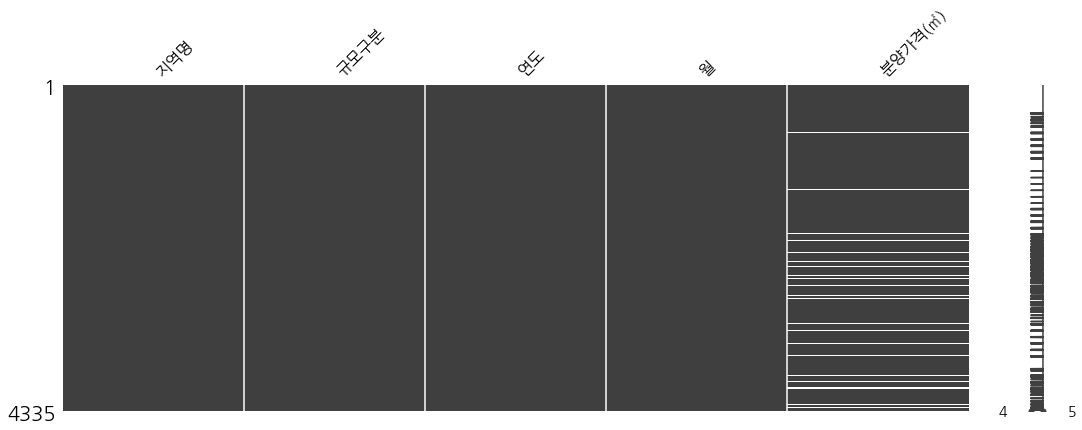

In [14]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

### 연도,월 -> string 으로 변경

In [15]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경 for 시각화 
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [16]:
pre_sale.dtypes

지역명        object
규모구분       object
연도         object
월          object
분양가격(㎡)    object
dtype: object

In [17]:
# 하나의 칼럼만 따로 인스턴스화 해주었습니다. 
# 데이터 프레임의 한 칼럼만 따로 떼어냈기 때문에 타입은 시리즈입니다.
pre_sales_price = pre_sale['분양가격(㎡)']

In [18]:
type(pre_sales_price)

pandas.core.series.Series

In [19]:
#object , 현재는 문자 타입
pre_sales_price.head() 

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [20]:
# 분양가격 타입을 숫자로 변경
pre_sale['분양가격'] = pd.to_numeric(pre_sales_price, errors='coerce')

In [21]:
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [22]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null object
월          4335 non-null object
분양가격(㎡)    4058 non-null object
분양가격       3957 non-null float64
평당분양가격     3957 non-null float64
dtypes: float64(2), object(5)
memory usage: 237.2+ KB


In [23]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

연도, 월은 위에서 문자 타입으로 변경된 것이 확인되고,   
to_numeric 을 통해서 float 타입의 분양가격 칼럼과 평당 분양칼럼이 생성된 것을 확인할 수 있습니다.

In [24]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
분양가격       378
평당분양가격     378
dtype: int64

결측치가 늘어난 이유는? 
아마도 분양가격(m^2)에서 공백값도 결측치가 아닌 값이 있는 것으로 인식했을 것이다. object 타입이기에.
반면에, 숫자타입에서는 공백도 결측치로 인식했을 것이다.그래서 공백이 nan으로 집계되서 늘어난 것이다. 

In [25]:
pre_sale.describe() #숫자타입(float, int)에들만 보여준다. 

,분양가격,평당분양가격
count,3957.000000,3957.000000
mean,3238.128633,10685.824488
std,1264.309933,4172.222780
min,1868.000000,6164.400000
25%,2441.000000,8055.300000
50%,2874.000000,9484.200000
75%,3561.000000,11751.300000
max,12728.000000,42002.400000


In [26]:
pre_sale.describe(include=[np.object])  # object 타입의 요약을 보여준다. 

,지역명,규모구분,연도,월,분양가격(㎡)
count,4335,4335,4335,4335,4058
unique,17,5,5,12,1753
top,세종,전체,2018,12,2221
freq,255,867,1020,425,17


top은 가장 많이 등장한 단어를 말하면, 그 횟수는 freq로 나타내며 여기서는 255 입니다.

### 2017~2019 연도별 데이터 추출

In [27]:
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017'] # dtype이 string이므로 '' 사이에 숫자를 넣는다
pre_sale_2017.shape             

(1020, 7)

In [28]:
pre_sale['규모구분'].value_counts()

전체                   867
전용면적 102㎡초과          867
전용면적 60㎡초과 85㎡이하     867
전용면적 85㎡초과 102㎡이하    867
전용면적 60㎡이하           867
Name: 규모구분, dtype: int64

In [29]:
pre_sale['지역명'].value_counts()

세종    255
대구    255
경남    255
경북    255
전남    255
대전    255
전북    255
경기    255
인천    255
충북    255
제주    255
충남    255
서울    255
부산    255
광주    255
울산    255
강원    255
Name: 지역명, dtype: int64

In [30]:
pre_sale['지역명'].unique()

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [31]:
pre_sale_2018 = pre_sale.loc[pre_sale['연도'] == '2018']
pre_sale_2018.shape

(1020, 7)

In [32]:
pre_sale_2019 = pre_sale.loc[pre_sale['연도'] == '2019']
pre_sale_2019.shape

(1020, 7)

## 전국평균 분양가격

- groupby 와 pivot_table 활용

In [33]:
pre_sale.groupby?

In [34]:
#pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T  # 숫자 데이터만 describe해서 보여준다.  

연도                    2015          2016          2017          2018  \
분양가격   count    243.000000    984.000000    899.000000    919.000000   
       mean    2788.707819   2934.250000   3139.541713   3326.951034   
       std      976.861182   1071.441561   1107.584870   1186.090839   
       min     1868.000000   1900.000000   1976.000000   2076.000000   
       25%     2225.000000   2282.000000   2365.000000   2525.000000   
       50%     2516.000000   2672.000000   2849.000000   2952.000000   
       75%     3025.500000   3148.500000   3456.000000   3698.000000   
       max     7092.000000   8096.000000   7887.000000   8098.000000   
평당분양가격 count    243.000000    984.000000    899.000000    919.000000   
       mean    9202.735802   9683.025000  10360.487653  10978.938411   
       std     3223.641902   3535.757150   3655.030071   3914.099768   
       min     6164.400000   6270.000000   6520.800000   6850.800000   
       25%     7342.500000   7530.600000   7804.500000   8332.500000   
       50%     8302.800000   8817.600000   9401.700000   9741.600000   
       75%     9984.150000  10390.050000  11404.800000  12203.400000   
       max    23403.600000  26716.800000  26027.100000  26723.400000   

연도                    2019  
분양가격   count    912.000000  
       mean    3693.422149  
       std     1563.205566  
       min     2124.000000  
       25%     2635.500000  
       50%     3395.000000  
       75%     4066.250000  
       max    12728.000000  
평당분양가격 count    912.000000  
       mean   12188.293092  
       std     5158.578369  
       min     7009.200000  
       25%     8697.150000  
       50%    11203.500000  
       75%    13418.625000  
       max    42002.400000

In [35]:
pre_sale.groupby(pre_sale.연도).describe()

분양가격                                                             \
      count         mean          std     min     25%     50%      75%   
연도                                                                       
2015  243.0  2788.707819   976.861182  1868.0  2225.0  2516.0  3025.50   
2016  984.0  2934.250000  1071.441561  1900.0  2282.0  2672.0  3148.50   
2017  899.0  3139.541713  1107.584870  1976.0  2365.0  2849.0  3456.00   
2018  919.0  3326.951034  1186.090839  2076.0  2525.0  2952.0  3698.00   
2019  912.0  3693.422149  1563.205566  2124.0  2635.5  3395.0  4066.25   

              평당분양가격                                                       \
          max  count          mean          std     min      25%      50%   
연도                                                                          
2015   7092.0  243.0   9202.735802  3223.641902  6164.4  7342.50   8302.8   
2016   8096.0  984.0   9683.025000  3535.757150  6270.0  7530.60   8817.6   
2017   7887.0  899.0  10360.487653  3655.030071  6520.8  7804.50   9401.7   
2018   8098.0  919.0  10978.938411  3914.099768  6850.8  8332.50   9741.6   
2019  12728.0  912.0  12188.293092  5158.578369  7009.2  8697.15  11203.5   

                          
            75%      max  
연도                        
2015   9984.150  23403.6  
2016  10390.050  26716.8  
2017  11404.800  26027.1  
2018  12203.400  26723.4  
2019  13418.625  42002.4

In [36]:
pre_sale.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [37]:
pre_sale.pivot_table?

In [38]:
pre_sale.pivot_table('평당분양가격','규모구분','연도') # value, index, columns

연도,2015,2016,2017,2018,2019
규모구분,,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816


### 전국 분양가 변동 금액

In [41]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year.head()

연도,지역명,2015,2016,2017,2018,2019
0,강원,7159.9,7011.125,7126.8,7680.750,8141.65
1,경기,10377.4,11220.000,11850.0,13185.975,14468.85
2,경남,7585.6,7847.950,8119.8,9019.450,9870.85
3,경북,7170.9,7360.650,7794.9,8505.200,8856.65
4,광주,8052.0,8898.725,9463.5,9855.725,11822.80


In [42]:
region_year.index

RangeIndex(start=0, stop=17, step=1)

In [43]:
region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index

<bound method DataFrame.reset_index of 연도      2015       2016     2017       2018       2019
지역명                                                   
강원    7159.9   7011.125   7126.8   7680.750   8141.650
경기   10377.4  11220.000  11850.0  13185.975  14468.850
경남    7585.6   7847.950   8119.8   9019.450   9870.850
경북    7170.9   7360.650   7794.9   8505.200   8856.650
광주    8052.0   8898.725   9463.5   9855.725  11822.800
대구    9232.3  10310.025  11455.8  12075.800  13852.025
대전    8098.2   8501.625   9044.7  10180.225  11777.700
부산   10307.0  10429.925  11577.9  12997.875  13116.400
서울   19725.2  20663.500  21375.9  22889.350  26131.050
세종    8750.5   8860.500   9135.3  10354.850  11078.925
울산   10052.9  10208.550  11345.1  10241.400  10022.100
인천   10484.1  10532.500  10736.7  11273.900  12634.875
전남    6317.3   6488.625   7187.7   7789.100   7902.400
전북    6703.4   6417.950   7057.8   7625.750   8196.650
제주    7405.2   9129.175  10830.9  11890.725  12137.950
충남    7114.8   7330.675   

In [45]:
sample = region_year_all.pivot_table('평당분양가격', '지역명', '연도')
sample.head()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7159.9,7011.125,7126.8,7680.750,8141.65
경기,10377.4,11220.000,11850.0,13185.975,14468.85
경남,7585.6,7847.950,8119.8,9019.450,9870.85
경북,7170.9,7360.650,7794.9,8505.200,8856.65
광주,8052.0,8898.725,9463.5,9855.725,11822.80


In [46]:
sample.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='지역명')

In [47]:
region_year['변동액'] = (region_year['2019'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액']) *1000
min_delta_price = np.min(region_year['변동액']) *1000
mean_delta_price = np.mean(region_year['변동액']) *1000

region_year

연도,지역명,2015,2016,2017,2018,2019,변동액
0,강원,7159.9,7011.125,7126.8,7680.750,8141.650,981
1,경기,10377.4,11220.000,11850.0,13185.975,14468.850,4091
2,경남,7585.6,7847.950,8119.8,9019.450,9870.850,2285
3,경북,7170.9,7360.650,7794.9,8505.200,8856.650,1685
4,광주,8052.0,8898.725,9463.5,9855.725,11822.800,3770
5,대구,9232.3,10310.025,11455.8,12075.800,13852.025,4619
6,대전,8098.2,8501.625,9044.7,10180.225,11777.700,3679
7,부산,10307.0,10429.925,11577.9,12997.875,13116.400,2809
8,서울,19725.2,20663.500,21375.9,22889.350,26131.050,6405
9,세종,8750.5,8860.500,9135.3,10354.850,11078.925,2328


In [48]:
print('2015년부터 2019년까지 분양가는 계속 상승했으며,  \
상승액이 가장 큰 지역은 서울이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))


2015년부터 2019년까지 분양가는 계속 상승했으며,  상승액이 가장 큰 지역은 서울이며 상승액은 평당 6,405,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 -30,000원이다.
하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
전국 평균 변동액은 평당 2,647,235원이다.
